In [1]:
# Import packages
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

In [12]:
# Import data portland_final.csv
df = pd.read_csv("portland_final.csv")

In [13]:
df.head(20)

,index_right,index_left,assetUid,latitude,longitude,pedestrianCount_sum,Unnamed: 0,geo_id,centroid,year,...,Empratio,estabratio,ratio_65,ratio_22_50,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio
0,503,0.0,0af0d63b-0817-4af1-9a44-1c23e6a03de2,45.504724,-122.622503,7500.0,166,41051000801,POINT (-122.6108897479948 45.50135311494248),2017,...,184.509425,13.617690,0.598675,0.077656,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413
1,503,3.0,29497269-f9c7-43b8-a482-c4bce4ef211a,45.505282,-122.605010,5664.0,166,41051000801,POINT (-122.6108897479948 45.50135311494248),2017,...,184.509425,13.617690,0.598675,0.077656,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413
2,503,13.0,901b0544-f704-4683-986d-97d4c949c106,45.505256,-122.609138,5150.0,166,41051000801,POINT (-122.6108897479948 45.50135311494248),2017,...,184.509425,13.617690,0.598675,0.077656,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413
3,503,14.0,92747343-e7b7-4e6e-aa8d-4eb9b111e193,45.505300,-122.601757,15395.0,166,41051000801,POINT (-122.6108897479948 45.50135311494248),2017,...,184.509425,13.617690,0.598675,0.077656,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413
4,743,0.0,0af0d63b-0817-4af1-9a44-1c23e6a03de2,45.504724,-122.622503,7500.0,167,41051000801,POINT (-122.6108897479948 45.50135311494248),2017,...,1083.796740,84.908917,0.598675,0.077656,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413
5,743,3.0,29497269-f9c7-43b8-a482-c4bce4ef211a,45.505282,-122.605010,5664.0,167,41051000801,POINT (-122.6108897479948 45.50135311494248),2017,...,1083.796740,84.908917,0.598675,0.077656,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413
6,743,13.0,901b0544-f704-4683-986d-97d4c949c106,45.505256,-122.609138,5150.0,167,41051000801,POINT (-122.6108897479948 45.50135311494248),2017,...,1083.796740,84.908917,0.598675,0.077656,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413
7,743,14.0,92747343-e7b7-4e6e-aa8d-4eb9b111e193,45.505300,-122.601757,15395.0,167,41051000801,POINT (-122.6108897479948 45.50135311494248),2017,...,1083.796740,84.908917,0.598675,0.077656,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413
8,1343,1.0,1d663439-3e17-4972-8111-d8641ffa2da7,45.511943,-122.622689,8723.0,319,41051001400,POINT (-122.6176377672391 45.51142207538373),2017,...,1597.929607,133.043478,0.615066,0.069021,1.000000,0.161565,0.161565,0.569161,0.150510,0.032880
9,1343,18.0,ad9745e0-d3e3-4513-9003-90b779c69f51,45.505364,-122.611321,16070.0,319,41051001400,POINT (-122.6176377672391 45.51142207538373),2017,...,1597.929607,133.043478,0.615066,0.069021,1.000000,0.161565,0.161565,0.569161,0.150510,0.032880


In [14]:
# Check all column names
df.columns

Index(['index_right', 'index_left', 'assetUid', 'latitude', 'longitude',
       'pedestrianCount_sum', 'Unnamed: 0', 'geo_id', 'centroid', 'year',
       'geometry', 'total_tran', 'pop', 'edut', 'collegemale', 'collegefemale',
       'households', 'income', 'zipcode', 'Empratio', 'estabratio', 'ratio_65',
       'ratio_22_50', 'bus_ratio', 'bus_ratio_total', 'public_ratio',
       'car_ratio', 'bicy_ratio', 'walked_ratio'],
      dtype='object')

# modeling

dependent variables(outputs):
1. Empratio : the size of employment  of all industries in corresponding us census tract and  year

2. estabratio: the size of establishment of all industries in corresponding us census tract and  year


use all the varaibles to predict establishment size 
1. pop: the total population of the corresponding census tract(not prediction)
2. households: households of the corresponding census tract
3. income: income of the corresponding census tract
4. edut: total education population of the corresponding census tract
5. total_college: college population of the corresponding census tract
6. college_ratio: total college ratio
7. ratio_65: the ratio of the population who are older than 65
8. ration_22_50: the ratio of the population who are from 22 to 50
9. diffEmpratio: the difference of employee size from last year at same census tract
10. diffestabratio: the difference of establishment size from last year at the same census tract
11. college_ratio_pop: the ratio of college attendance by the total population
12. bus_ratio: the ratio of bus usage by total public transportation
13. bus_ratio_total: the ratio of bus usage by total transportation(including private and public transportation)
14. public_ratio: the ratio of public transportation by total transportation
15. car_ratio: the ratio of car usage by total transportation
16. bicy_ratio: the ratio of bicycle usage by total transportation
17. walked_ratio: ration of people who walked to work by total transportation usage
18. gini: Gini index of the corresponding census tract

In [15]:
# Calculate the total population with college degrees
df["total_college"] = df["collegemale"] + df["collegefemale"]

# Calculate the ratio of people with college degree vs education population
df["college_ratio"] = df["total_college"] / df["edut"]

# Calculate the ratio of people with college degree vs total population
df["college_ratio_pop"] = df["total_college"] / df["pop"]

In [16]:
data = df[["zipcode", "geo_id", "year", "pop", "households", "income", "edut", "total_college", "college_ratio",
          "ratio_65", "ratio_22_50", "college_ratio_pop", "bus_ratio", 
           "bus_ratio_total", "public_ratio", "car_ratio", "bicy_ratio", "walked_ratio", "pedestrianCount_sum",
           "Empratio", "estabratio"]]

In [17]:
data.head(20)

,zipcode,geo_id,year,pop,households,income,edut,total_college,college_ratio,ratio_65,...,college_ratio_pop,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio,pedestrianCount_sum,Empratio,estabratio
0,97202,41051000801,2017,4829.0,155.0,2064.0,3790.0,1158.0,0.305541,0.598675,...,0.239801,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413,7500.0,184.509425,13.617690
1,97202,41051000801,2017,4829.0,155.0,2064.0,3790.0,1158.0,0.305541,0.598675,...,0.239801,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413,5664.0,184.509425,13.617690
2,97202,41051000801,2017,4829.0,155.0,2064.0,3790.0,1158.0,0.305541,0.598675,...,0.239801,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413,5150.0,184.509425,13.617690
3,97202,41051000801,2017,4829.0,155.0,2064.0,3790.0,1158.0,0.305541,0.598675,...,0.239801,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413,15395.0,184.509425,13.617690
4,97206,41051000801,2017,4829.0,155.0,2064.0,3790.0,1158.0,0.305541,0.598675,...,0.239801,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413,7500.0,1083.796740,84.908917
5,97206,41051000801,2017,4829.0,155.0,2064.0,3790.0,1158.0,0.305541,0.598675,...,0.239801,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413,5664.0,1083.796740,84.908917
6,97206,41051000801,2017,4829.0,155.0,2064.0,3790.0,1158.0,0.305541,0.598675,...,0.239801,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413,5150.0,1083.796740,84.908917
7,97206,41051000801,2017,4829.0,155.0,2064.0,3790.0,1158.0,0.305541,0.598675,...,0.239801,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413,15395.0,1083.796740,84.908917
8,97215,41051001400,2017,5549.0,141.0,2469.0,4419.0,1675.0,0.379045,0.615066,...,0.301856,1.000000,0.161565,0.161565,0.569161,0.150510,0.032880,8723.0,1597.929607,133.043478
9,97215,41051001400,2017,5549.0,141.0,2469.0,4419.0,1675.0,0.379045,0.615066,...,0.301856,1.000000,0.161565,0.161565,0.569161,0.150510,0.032880,16070.0,1597.929607,133.043478


In [18]:
data.describe()

,zipcode,geo_id,year,pop,households,income,edut,total_college,college_ratio,ratio_65,...,college_ratio_pop,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio,pedestrianCount_sum,Empratio,estabratio
count,45.000000,4.500000e+01,45.0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,...,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,97210.466667,4.105100e+10,2017.0,4915.844444,150.400000,2047.177778,3733.222222,1240.600000,0.346970,0.584103,...,0.269117,0.961862,0.130743,0.136263,0.588212,0.120600,0.050993,7805.955556,975.119932,70.138880
std,12.241138,2.301072e+03,0.0,1888.655811,15.801899,599.391900,1211.703738,393.093986,0.076941,0.075745,...,0.067498,0.055165,0.037331,0.040148,0.074159,0.043967,0.026001,3780.424092,1142.249282,83.736681
min,97202.000000,4.105100e+10,2017.0,1665.000000,121.000000,688.000000,1230.000000,494.000000,0.115169,0.436265,...,0.070898,0.785829,0.067677,0.072222,0.493065,0.003530,0.010925,3149.000000,7.822736,0.570328
25%,97202.000000,4.105100e+10,2017.0,3413.000000,140.000000,1551.000000,2726.000000,901.000000,0.305541,0.535049,...,0.239801,0.937063,0.106362,0.106362,0.549205,0.107035,0.032880,5664.000000,326.915521,27.159136
50%,97206.000000,4.105100e+10,2017.0,4829.000000,150.000000,2064.000000,3790.000000,1158.000000,0.371853,0.598675,...,0.292704,1.000000,0.131579,0.131579,0.569161,0.126768,0.035342,5883.000000,819.471936,51.321820
75%,97214.000000,4.105100e+10,2017.0,5549.000000,155.000000,2469.000000,4419.000000,1675.000000,0.379045,0.615066,...,0.301856,1.000000,0.161565,0.161565,0.648785,0.150510,0.084343,8723.000000,1165.248869,84.908917
max,97266.000000,4.105101e+10,2017.0,11030.000000,190.000000,3241.000000,6790.000000,1912.000000,0.436330,0.750192,...,0.366846,1.000000,0.190145,0.208061,0.797038,0.200279,0.096918,16070.000000,5542.663122,409.075399


In [19]:
# Label our Empratio and estabratio
# Transfer continous data to 4 groups of categorical data by quartile
# emp_label: 0 < 59.451386 < 363.368506 < 1224.943938 < infinity
# est_label: 0 < 3.579339 < 20.674918 < 69.929409 < infinity

data["emp_label"] = pd.qcut(data["Empratio"], 4, labels = ["Low", "Medium Low", "Medium High", "High"])
data["est_label"] = pd.qcut(data["estabratio"], 4, labels = ["Low", "Medium Low", "Medium High", "High"])

/Users/zehui/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/zehui/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [20]:
data.head(20)

,zipcode,geo_id,year,pop,households,income,edut,total_college,college_ratio,ratio_65,...,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio,pedestrianCount_sum,Empratio,estabratio,emp_label,est_label
0,97202,41051000801,2017,4829.0,155.0,2064.0,3790.0,1158.0,0.305541,0.598675,...,0.131579,0.131579,0.648785,0.113698,0.034413,7500.0,184.509425,13.617690,Low,Low
1,97202,41051000801,2017,4829.0,155.0,2064.0,3790.0,1158.0,0.305541,0.598675,...,0.131579,0.131579,0.648785,0.113698,0.034413,5664.0,184.509425,13.617690,Low,Low
2,97202,41051000801,2017,4829.0,155.0,2064.0,3790.0,1158.0,0.305541,0.598675,...,0.131579,0.131579,0.648785,0.113698,0.034413,5150.0,184.509425,13.617690,Low,Low
3,97202,41051000801,2017,4829.0,155.0,2064.0,3790.0,1158.0,0.305541,0.598675,...,0.131579,0.131579,0.648785,0.113698,0.034413,15395.0,184.509425,13.617690,Low,Low
4,97206,41051000801,2017,4829.0,155.0,2064.0,3790.0,1158.0,0.305541,0.598675,...,0.131579,0.131579,0.648785,0.113698,0.034413,7500.0,1083.796740,84.908917,Medium High,Medium High
5,97206,41051000801,2017,4829.0,155.0,2064.0,3790.0,1158.0,0.305541,0.598675,...,0.131579,0.131579,0.648785,0.113698,0.034413,5664.0,1083.796740,84.908917,Medium High,Medium High
6,97206,41051000801,2017,4829.0,155.0,2064.0,3790.0,1158.0,0.305541,0.598675,...,0.131579,0.131579,0.648785,0.113698,0.034413,5150.0,1083.796740,84.908917,Medium High,Medium High
7,97206,41051000801,2017,4829.0,155.0,2064.0,3790.0,1158.0,0.305541,0.598675,...,0.131579,0.131579,0.648785,0.113698,0.034413,15395.0,1083.796740,84.908917,Medium High,Medium High
8,97215,41051001400,2017,5549.0,141.0,2469.0,4419.0,1675.0,0.379045,0.615066,...,0.161565,0.161565,0.569161,0.150510,0.032880,8723.0,1597.929607,133.043478,High,High
9,97215,41051001400,2017,5549.0,141.0,2469.0,4419.0,1675.0,0.379045,0.615066,...,0.161565,0.161565,0.569161,0.150510,0.032880,16070.0,1597.929607,133.043478,High,High


# Decision Tree

We want to explain our prediction using a simple and interpretable model. Thus, we use decision tree first.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

## Employment label

In [23]:
data = data.dropna()
# First, create our X and y
X = data.loc[ : , "pop":"pedestrianCount_sum"]
y_emp = data.loc[ : , "emp_label"]

# Then, split into 70% train set and 30% test set
X_train, X_test, y_train_emp, y_test_emp=train_test_split(X, y_emp, test_size=0.3,random_state=2020)

In [24]:
#Using the GridSearchCV to find optimal estimators and leaf nodes
param_grid = {'max_depth':range(1,11), 'max_leaf_nodes':range(2,21)}
dt = DecisionTreeClassifier()
gr = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy')
rs = gr.fit(X_train, y_train_emp)
print(rs.best_params_)
print(rs.score(X_test, y_test_emp))

{'max_depth': 5, 'max_leaf_nodes': 4}
0.5714285714285714


In [25]:
from sklearn import tree

# Use max_depth = 5 and max_leaf_nodes = 4 in this case
dt = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes = 4)
dt.fit(X_train, y_train_emp)

thestring = tree.export_graphviz(dt,out_file = None,
                         feature_names = X_train.columns.values,  
                         class_names = dt.classes_,  
                         filled = True, rounded = True,  
                         special_characters = True, impurity = False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")

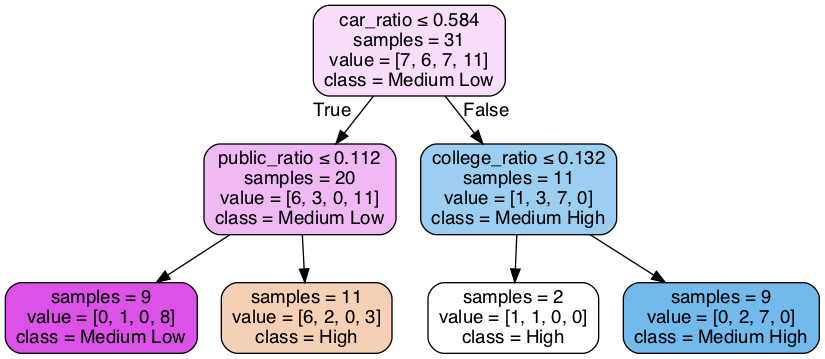

In [26]:
from IPython.display import Image  
import pydotplus
thestring = tree.export_graphviz(dt, out_file = None,  
                         feature_names = X_train.columns.values, 
                         class_names = dt.classes_,  
                         filled = True, rounded = True,  
                         special_characters = True, impurity = False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())

In [29]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
12,car_ratio,0.52591
11,public_ratio,0.326578
5,college_ratio,0.147512
0,pop,0
1,households,0


## Establishment label

In [30]:
data = data.dropna()
# First, create our X and y
X = data.loc[ : , "pop":"pedestrianCount_sum"]
y_est = data.loc[ : , "est_label"]

# Then, split into 70% train set and 30% test set
X_train, X_test, y_train_est, y_test_est = train_test_split(X, y_est, test_size=0.3,random_state=2020)

In [31]:
#Using the GridSearchCV to find optimal estimators and leaf nodes
param_grid = {'max_depth':range(1,11), 'max_leaf_nodes':range(2,30)}
dt = DecisionTreeClassifier()
gr = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy')
rs = gr.fit(X_train, y_train_est)
print(rs.best_params_)
print(rs.score(X_test, y_test_est))

{'max_depth': 4, 'max_leaf_nodes': 3}
0.5714285714285714


In [32]:
# Use max_depth = 4 and max_leaf_nodes = 3 in this case
dt = DecisionTreeClassifier(max_depth = 4, max_leaf_nodes = 3)
dt.fit(X_train, y_train_est)

thestring = tree.export_graphviz(dt,out_file = None,
                         feature_names = X_train.columns.values,  
                         class_names = dt.classes_,  
                         filled = True, rounded = True,  
                         special_characters = True, impurity = False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")

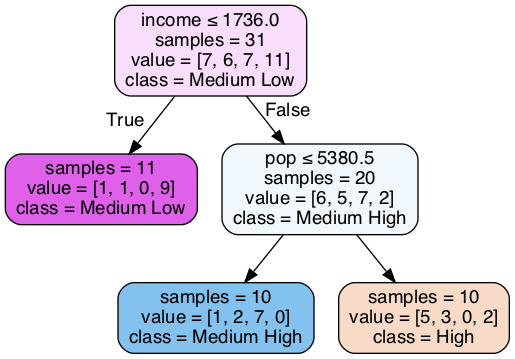

In [33]:
thestring = tree.export_graphviz(dt, out_file = None,  
                         feature_names = X_train.columns.values, 
                         class_names = dt.classes_,  
                         filled = True, rounded = True,  
                         special_characters = True, impurity = False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  

In [34]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
2,income,0.589185
0,pop,0.410815
1,households,0
3,edut,0
4,total_college,0


# Random Forest

Random forest can estimate feature importance and avoid overfitting. We want to see the accurary of prediction and importance of top variables.<br>
We test employment label and establishment label as output.

## Employment label

In [40]:
data = data.dropna()
# First, create our X and y
X = data.loc[ : , "pop":"pedestrianCount_sum"]
y_emp = data.loc[ : , "emp_label"]

# Then, split into 70% train set and 30% test set
X_train, X_test, y_train_emp, y_test_emp=train_test_split(X, y_emp, test_size=0.3,random_state=2020)

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Random forest model
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1,max_leaf_nodes=4)
rf.fit(X_train, y_train_emp)
print (rf.score(X_test, y_test_emp))

0.5714285714285714


In [49]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
1,households,0.125869
12,car_ratio,0.105174
10,bus_ratio_total,0.1032
14,walked_ratio,0.0934879
3,edut,0.083645


## Establishment label

In [50]:
data = data.dropna()
# First, create our X and y
X = data.loc[ : , "pop":"pedestrianCount_sum"]
y_est = data.loc[ : , "est_label"]

# Then, split into 70% train set and 30% test set
X_train, X_test, y_train_est, y_test_est = train_test_split(X, y_est, test_size=0.3,random_state=2020)

In [51]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1,max_leaf_nodes=3)
rf.fit(X_train, y_train_est)
print (rf.score(X_test, y_test_est))

0.5714285714285714
